# Cobb-Douglas Simple Consumer Model Solver and Plotter

## Modules

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

## Variables and Formulas

In [55]:
x1,x2=symbols("x_1 x_2") #Goods
p1,p2=symbols("p_1 p_2") #Prices
R=symbols("R") #Income
alpha=symbols("alpha") #Power

In [56]:
U=x1**alpha*x2**(1-alpha) # Cobb-Douglas Utility Function
U

x_1**alpha*x_2**(1 - alpha)

In [4]:
MRS=simplify(diff(U,x1)/diff(U,x2)) # Marginal Rate of Substitution
MRS

-alpha*x_2/(x_1*(alpha - 1))

In [7]:
budget=p1*x1+p2*x2-R #Budget Constraint
budget

-R + p_1*x_1 + p_2*x_2

In [14]:
BO=(R-p1*x1)/p2
BO

(R - p_1*x_1)/p_2

In [5]:
Eq(MRS,p1/p2) #First Order Condition

Eq(-alpha*x_2/(x_1*(alpha - 1)), p_1/p_2)

## Solver

In [57]:
def CobbDouglas_solver(R_check,p1_check,p2_check,alpha_check):
    U_check=(MRS-p1/p2).subs(p1,p1_check).subs(p2,p2_check).subs(alpha,alpha_check)
    budget_check=budget.subs(p1,p1_check).subs(p2,p2_check).subs(R,R_check)
    resh1=solve(U_check,x1)[0]
    resh2=solve(U_check,x2)[0]
    resh3=solve(budget_check.subs(x2,resh2),x1)[0]
    resh4=solve(budget_check.subs(x1,resh1),x2)[0]

    return [resh1,resh2,resh3,resh4]

### Examples

In [58]:
CobbDouglas_solver(16,3,1,0.5) #Example

[0.333333333333333*x_2, 3.0*x_1, 2.66666666666667, 8.00000000000000]

## Plotter

In [109]:
def CobbDouglas_plotter(R_check,p1_check,p2_check,alpha_check,n_tochek=50):
    x1_opt_check=CobbDouglas_solver(R_check,p1_check,p2_check,alpha_check)[2]
    x2_opt_check=CobbDouglas_solver(R_check,p1_check,p2_check,alpha_check)[3]
    
    
    U_check=U.subs(p1,p1_check).subs(p2,p2_check).subs(alpha,alpha_check)
    U_resh_check=U_check.subs(x1,x1_opt_check).subs(x2,x2_opt_check)
    
    gr=solve(U_check-round(U_resh_check,4),x2)[0]
    

    lambda_x2_x1=lambdify(x1,gr)
    x1_u_x2=np.arange(x1_opt_check/10,2*x1_opt_check,
                      2*x1_opt_check/(n_tochek))
    x2_u_x1=lambda_x2_x1(x1_u_x2)
    

    
    BO_check=BO.subs(p1,p1_check).subs(p2,p2_check).subs(R,R_check)
    lambda_BO_x1=lambdify(x1,BO_check)
    
    x2_BO_x1=lambda_BO_x1(x1_u_x2)
    

    
    fig, ax = plt.subplots() 
    
    
    ax.set_title(f'U=x_1^{alpha_check}  x_2^{1-alpha_check}', fontsize=16)
    ax.set_xlabel(r'$x_1$', fontsize=14) 
    ax.set_ylabel(r'$x_2$', fontsize=14)
    
    ax.grid(which='major', linewidth=1.2) 
    ax.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)
    
    ax.plot(x1_u_x2, x2_u_x1, label='U')
    
    ax.plot(x1_u_x2, x2_BO_x1, label='BO')
    ax.scatter(x1_opt_check,x2_opt_check,c='r',s=150,marker="*")
    ax.plot([x1_opt_check,x1_opt_check], [0,x2_opt_check],linestyle='--', color='black')
    ax.plot([0,x1_opt_check], [x2_opt_check,x2_opt_check],linestyle='--', color='black')
    
    ax.set_xlim(0,2*float(x1_opt_check))
    ax.set_ylim(0,2*float(x2_opt_check))
    
    ax.legend()
    plt.show()

### Examples

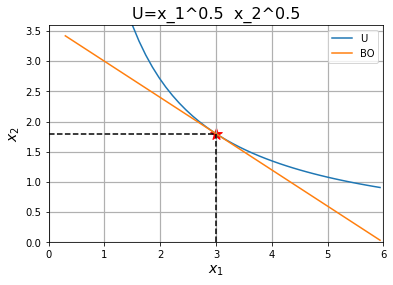

In [110]:
CobbDouglas_plotter(18,3,5,0.5)